In [30]:
#loading imports
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import utils
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Load the MNIST data set

In [88]:
#load data and target from mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [94]:
#finding out the number of training data
train_labels.shape

(60000,)

In [96]:
#finding out the number of testing data
test_labels.shape

(10000,)

Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

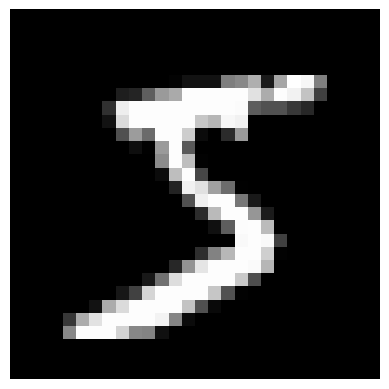

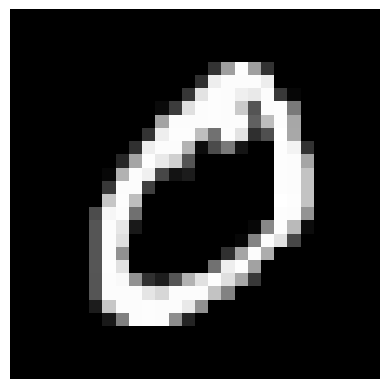

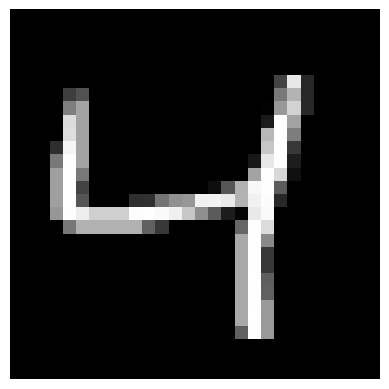

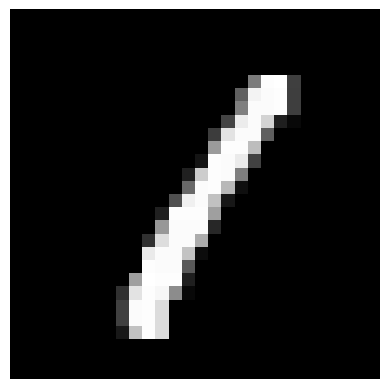

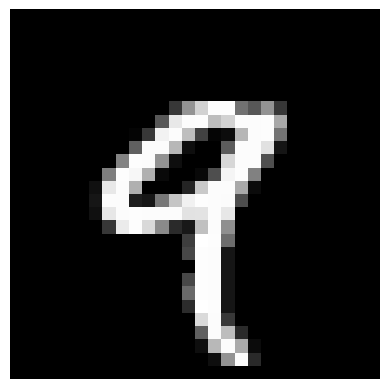

In [89]:
for i in range(5):
    plt.imshow(train_images[i], cmap='gray'), plt.axis("off")
    plt.show()

In [73]:
#print first five labels of the training set
print(train_labels[:5])

[5 0 4 1 9]


Build and train a Keras CNN classifier on the MNIST training set.

In [74]:
#reshaping training image into features
data_train = train_images.reshape(train_images.shape[0], channels, height, width)

In [75]:
#reshape test image data into features
data_test = test_images.reshape(test_images.shape[0], channels, height, width)

In [76]:
#rescale pixel intensity
features_train = data_train/255
features_test = data_test/255

In [77]:
#one hot encode target
target_train = utils.to_categorical(train_labels)
target_test = utils.to_categorical(test_labels)
number_of_classes = target_test.shape[1]

In [78]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
#rescaling image in greyscale
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [80]:
#rescaling image in greyscale
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [81]:
# Applying the function to training and testing set labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [84]:
#train the classifier
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 2/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 3/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 4/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0038 - accuracy: 0.9990
Epoch 5/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0031 - accuracy: 0.9990


Report the test accuracy of your model.

In [85]:
#accuracy is 0.99!
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0524 - accuracy: 0.9915
Test accuracy: 0.9915000200271606


Display a confusion matrix on the test set classifications.

In [86]:
#confusion matrix with predictions
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
confusion = confusion_matrix(np.argmax(test_labels, axis=1), predictions)
print(confusion)

313/313 [==============================] - 1s 4ms/step
[[ 977    1    0    0    0    0    0    2    0    0]
 [   0 1129    1    1    0    2    1    1    0    0]
 [   1    0 1021    2    0    0    1    7    0    0]
 [   0    0    2 1003    0    5    0    0    0    0]
 [   0    0    0    0  977    0    1    0    0    4]
 [   1    0    0    3    0  886    1    0    1    0]
 [   3    2    0    1    1    5  944    0    2    0]
 [   0    3    2    0    0    0    0 1020    0    3]
 [   3    0    1    1    0    1    0    1  963    4]
 [   2    1    0    1    4    4    0    2    0  995]]


Summarize your results.

MNIST is short for Modified National Institute of Standards and Technology database. In this project we had a set of images and labels that we are going to train, from the MNIST. The data is already split up in training and testing sets so I did not need to run that step. 

Each row of the confusion matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). A higher value on the diagonal indicates that the model has correctly classified instances of that class. Accuracy for this model is 0.99. This is a well-done handwritten dataset that can be used very well to train new data. 